In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip uninstall tensorflow

In [ ]:
pip install tensorflow

In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [13]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile
zip_ref=zipfile.ZipFile("/content/plantvillage-dataset.zip","r")
zip_ref.extractall()
zip_ref.close()

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from tensorflow.keras.preprocessing import image,image_dataset_from_directory
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import model_from_json
from keras.utils import to_categorical

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
def convert_image_to_array(image_dir):
  try:
    image=cv2.imread(image_dir)
    if image is not None:
      image=cv2.resize(image,(256,256))
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
    print(f"Error: {e}")
    return None

# 4. Potato

### Potato Healthy images

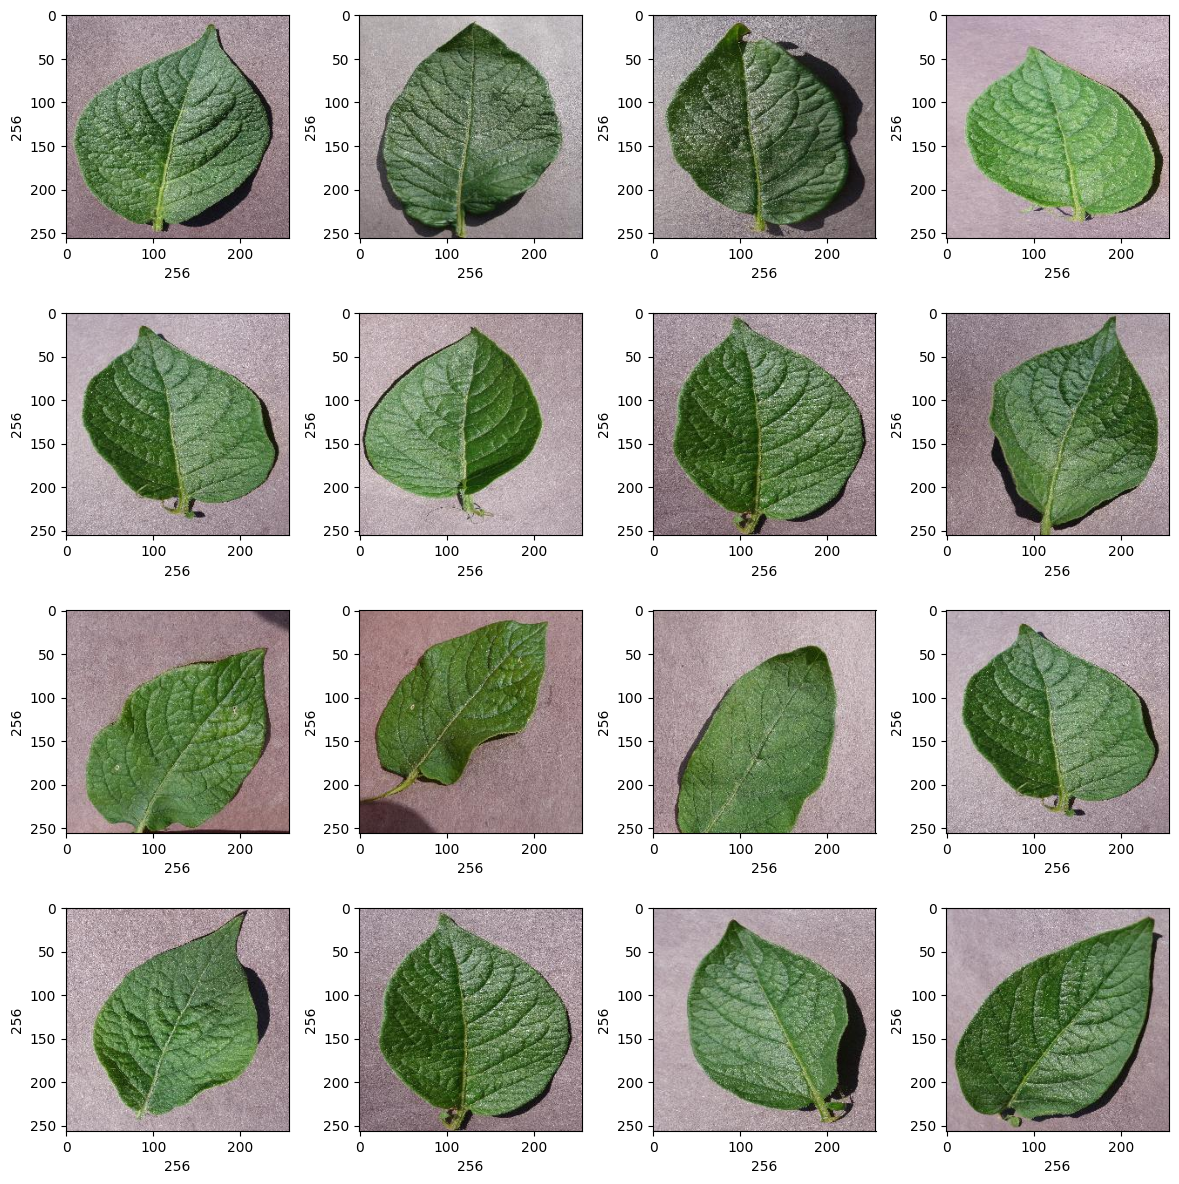

In [ ]:
plt.figure(figsize=(12,12))
path="/content/plantvillage dataset/color/Potato___healthy"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img=imread(path+'/'+random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=10)
  plt.ylabel(rand_img.shape[0], fontsize=10)

### Potato___Late_blight

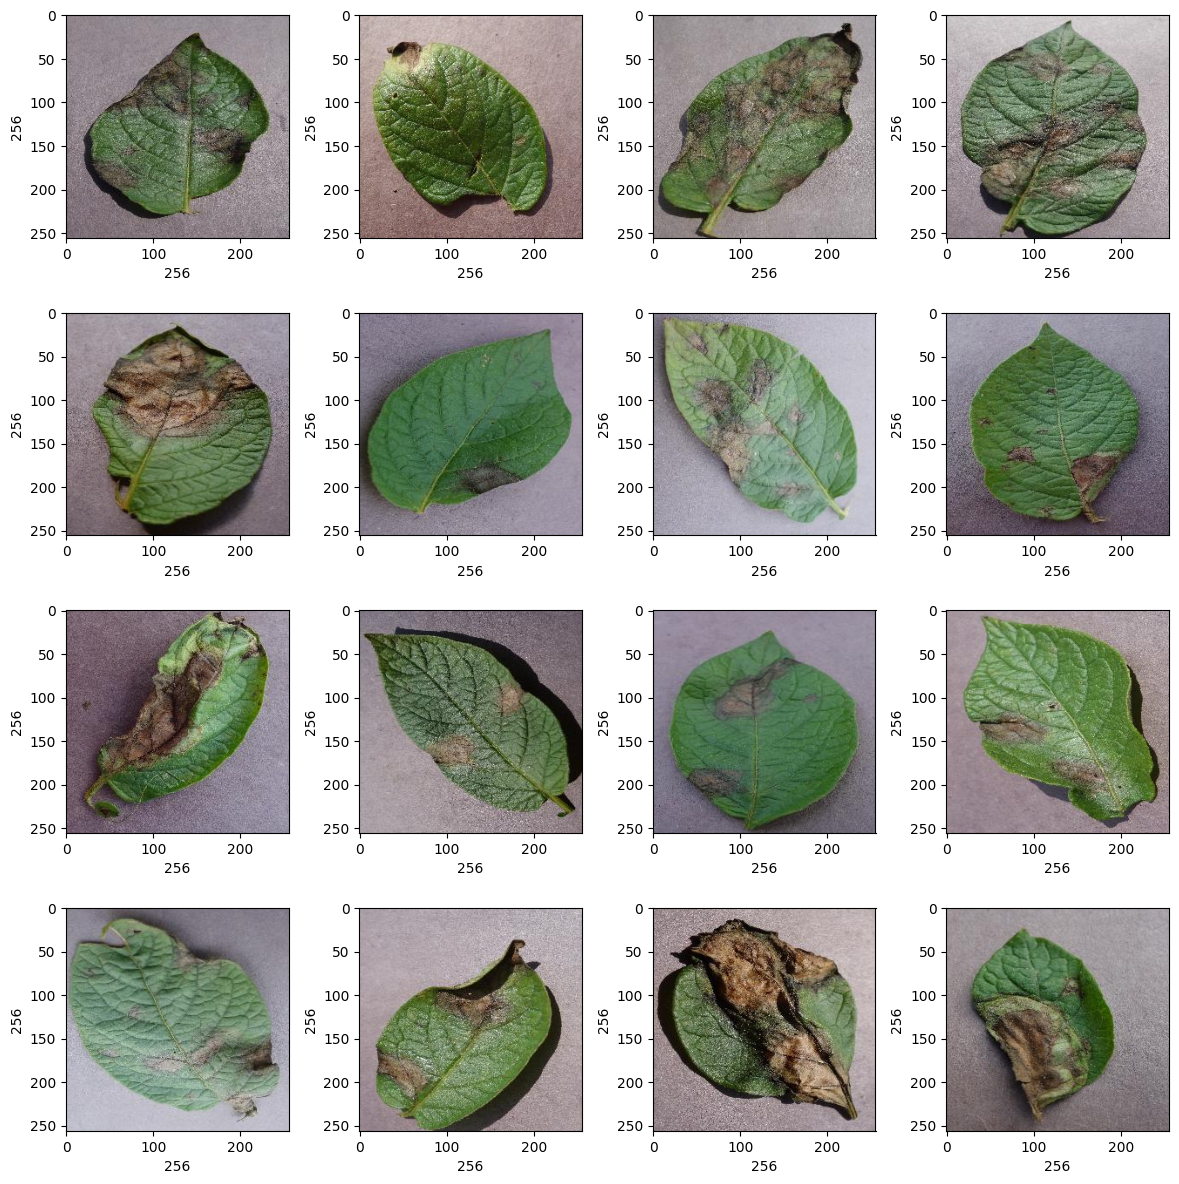

In [ ]:
plt.figure(figsize=(12,12))
path="/content/plantvillage dataset/color/Potato___Late_blight"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img=imread(path+'/'+random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=10)
  plt.ylabel(rand_img.shape[0], fontsize=10)

### Potato___Early_blight

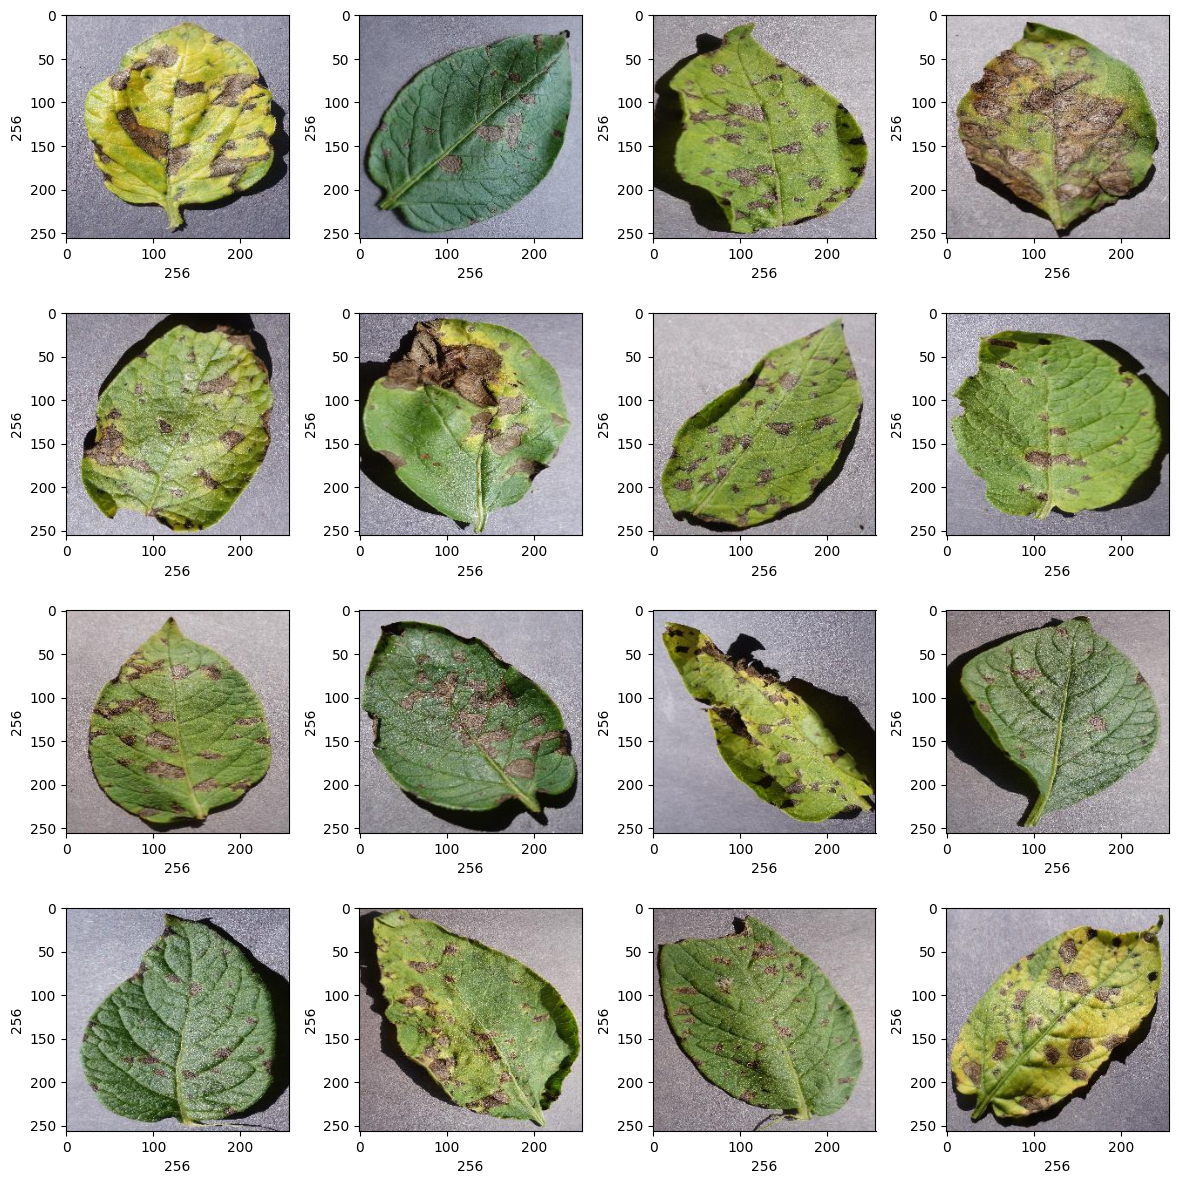

In [ ]:
plt.figure(figsize=(12,12))
path="/content/plantvillage dataset/color/Potato___Early_blight"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img=imread(path+'/'+random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=10)
  plt.ylabel(rand_img.shape[0], fontsize=10)

In [ ]:
dir="/content/plantvillage dataset/color"
image_list,label_list=[],[]
all_labels=['Potato___Early_blight', 'Potato___Late_blight','Potato___healthy']
binary_labels=[0,1,2]
temp=-1

for directory in all_labels:
  plant_image_list=listdir(f"{dir}/{directory}")
  temp+=1
  for files in plant_image_list:
    image_path=f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

### here
label | Condition

0 -> Potato___Early_blight

1 -> Potato___Late_blight

2 -> Potato___healthy

In [ ]:
label_counts=pd.DataFrame(label_list).value_counts()
label_counts.head()

0
0    1000
1    1000
2     152
Name: count, dtype: int64

### Data Augmentation

In [14]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import numpy as np


In [15]:
def augment_images(input_folder, output_folder, augmentations_per_image=5):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    datagen = ImageDataGenerator(
        rotation_range=30,      # Random rotation
        width_shift_range=0.2,  # Horizontal shift
        height_shift_range=0.2, # Vertical shift
        shear_range=0.2,        # Shearing
        zoom_range=0.2,         # Zooming
        horizontal_flip=True,   # Horizontal flipping
        fill_mode='nearest'     # Filling after transformation
    )

    # Loop through each image in the folder
    for img_name in os.listdir(input_folder):
        img_path = os.path.join(input_folder, img_name)
        img = load_img(img_path)  # Load image
        img_array = img_to_array(img)  # Convert to array
        img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for compatibility

        # Generate augmented images
        i = 0
        for batch in datagen.flow(img_array, batch_size=1,
                                  save_to_dir=output_folder,
                                  save_prefix='aug',
                                  save_format='jpeg'):
            i += 1
            if i >= augmentations_per_image:
                break


In [16]:
# Paths to folders
Potato___healthy = '/content/plantvillage dataset/color/Potato___healthy'
Potato___Early_blight = '/content/plantvillage dataset/color/Potato___Early_blight'
Potato___Late_blight = '/content/plantvillage dataset/color/Potato___Late_blight'

# Output folders
augmented_Potato___healthy = '/content/augmented2/Potato___healthy'
augmented_Potato___Early_blight = '/content/augmented2/Potato___Early_blight'
augmented_Potato___Late_blight='/content/augmented2/Potato___Late_blight'

# Perform augmentation
augment_images(Potato___healthy, augmented_Potato___healthy, augmentations_per_image=7)
augment_images(Potato___Early_blight, augmented_Potato___Early_blight, augmentations_per_image=2)
augment_images(Potato___Late_blight, augmented_Potato___Late_blight, augmentations_per_image=2)

print("Data augmentation completed!")


Data augmentation completed!


In [17]:
image_list,label_list=[],[]
all_dir=['/content/augmented2/Potato___Early_blight', '/content/augmented2/Potato___Late_blight','/content/augmented2/Potato___healthy']
binary_labels=[0,1,2]
temp=-1
count=0

for directory in all_dir:
  plant_image_list=listdir(directory)
  temp+=1
  for files in plant_image_list:
    image_path=f"{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])
    count+=1
    if(count>1000):
      count=0
      break

In [18]:
len(image_list)

3003

In [19]:
df=pd.DataFrame(label_list)

In [20]:
df[df[0]==1].count()

0    1001
dtype: int64

In [21]:
label_counts=pd.DataFrame(label_list).value_counts()
label_counts.head()

0
0    1001
1    1001
2    1001
Name: count, dtype: int64

In [22]:
image_list[0].shape

(256, 256, 3)

In [23]:
x_train,x_test,y_train,y_test= train_test_split(image_list,label_list,test_size=0.33,random_state=45)

In [24]:
x_train=np.array(x_train,dtype=np.float16)/255.0
x_test=np.array(x_test,dtype=np.float16)/255.0
x_train=x_train.reshape(-1,256,256,3)
x_test=x_test.reshape(-1,256,256,3)

In [25]:
x_train[0].shape

(256, 256, 3)

In [26]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [27]:
x_train

array([[[[0.612 , 0.5566, 0.5605],
         [0.608 , 0.5527, 0.5566],
         [0.6157, 0.5605, 0.565 ],
         ...,
         [0.533 , 0.4785, 0.502 ],
         [0.5215, 0.4666, 0.4902],
         [0.5254, 0.4707, 0.4941]],

        [[0.612 , 0.5566, 0.5605],
         [0.608 , 0.5527, 0.5566],
         [0.612 , 0.5566, 0.5605],
         ...,
         [0.5176, 0.4626, 0.4863],
         [0.533 , 0.4785, 0.502 ],
         [0.549 , 0.4941, 0.5176]],

        [[0.612 , 0.5566, 0.5605],
         [0.608 , 0.5527, 0.5566],
         [0.608 , 0.5527, 0.5566],
         ...,
         [0.5605, 0.506 , 0.5293],
         [0.5767, 0.5215, 0.545 ],
         [0.5845, 0.5293, 0.5527]],

        ...,

        [[0.7764, 0.7295, 0.753 ],
         [0.7686, 0.7217, 0.745 ],
         [0.7607, 0.714 , 0.7373],
         ...,
         [0.608 , 0.5923, 0.612 ],
         [0.6   , 0.604 , 0.6196],
         [0.392 , 0.4038, 0.4197]],

        [[0.7686, 0.7217, 0.745 ],
         [0.757 , 0.71  , 0.7334],
         [0.

In [28]:
y_train

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
from tensorflow.keras.applications import DenseNet121
from keras.utils import plot_model

In [ ]:
densenet=DenseNet121(
    weights="imagenet",
    input_shape=(256,256,3),
    include_top=False
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
densenet.trainable=True

In [32]:
densenet.layers

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [ ]:
## denseenet
flag=False
for layer in densenet.layers:
  if layer.name == "conv5_block15_2_conv":
    flag=True
  if flag:
    layer.trainable=False
  else:
    layer.trainable=True

In [38]:
for layer in densenet.layers:
  print("Layer name :",layer.name," Is Trainable :",layer.trainable)

Layer name : input_layer  Is Trainable : True
Layer name : block1_conv1  Is Trainable : True
Layer name : block1_conv2  Is Trainable : True
Layer name : block1_pool  Is Trainable : True
Layer name : block2_conv1  Is Trainable : True
Layer name : block2_conv2  Is Trainable : True
Layer name : block2_pool  Is Trainable : True
Layer name : block3_conv1  Is Trainable : True
Layer name : block3_conv2  Is Trainable : True
Layer name : block3_conv3  Is Trainable : True
Layer name : block3_pool  Is Trainable : True
Layer name : block4_conv1  Is Trainable : True
Layer name : block4_conv2  Is Trainable : True
Layer name : block4_conv3  Is Trainable : True
Layer name : block4_pool  Is Trainable : True
Layer name : block5_conv1  Is Trainable : False
Layer name : block5_conv2  Is Trainable : False
Layer name : block5_conv3  Is Trainable : False
Layer name : block5_pool  Is Trainable : False


In [41]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *

def create_model(base_model, name):
    inputs = Input(shape=(256,256,3))
    hidden1=base_model(inputs)
    hidden2=GlobalAveragePooling2D()(hidden1)
    hidden3=Dense(128,activation="relu")(hidden2)
    hidden4=Dropout(0.2)(hidden3)
    hidden5=Dense(64,activation="relu")(hidden4)
    hidden6=Dropout(0.2)(hidden5)
    output=Dense(3,activation="softmax")(hidden6)
    model = Model(inputs, output, name=name)
    return model

In [ ]:
densenet_model = create_model(densenet, "DenseNet121")

In [46]:
densenet_model.summary()

Model: "VGG16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 8, 8, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,788,803 (56.41 MB)

 Trainable params: 7,709,379 (29.41 MB)

 Non-trainable params: 7,079,424 (27.01 MB)

In [50]:
densenet.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,635,264 (29.13 MB)

 Non-trainable params: 7,079,424 (27.01 MB)

In [53]:
plot_model(densenet,show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [ ]:
from tensorflow.keras.optimizers import AdamW
optimizer = AdamW(learning_rate=1e-4, weight_decay=1e-4)
densenet_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
from sklearn.utils import resample

def train_with_bootstrap(model, x_train, y_train, x_test, y_test, epochs=10, batch_size=32):
    # Bootstrap Sampling: Select 80% of the training data with replacement
    subset_size = int(len(x_train) * 0.8)
    x_train_subset, y_train_subset = resample(x_train, y_train, replace=True, n_samples=subset_size, random_state=42)
    dataset_path = "/content/drive/MyDrive/potato_bagging_densenet_dataset.npz"

    # Save the dataset in Google Drive
    np.savez_compressed(dataset_path, 
                        x_train_subset=x_train_subset, 
                        y_train_subset=y_train_subset, 
                        x_test=x_test, y_test=y_test)
    
    # Train the model on the bootstrapped subset
    history=model.fit(x_train_subset, y_train_subset, validation_data=(x_test, y_test),
              epochs=epochs, batch_size=batch_size, verbose=1)
    return history,model

In [ ]:
history_densenet,densenet_model=train_with_bootstrap(densenet_model,x_train, y_train,x_test,y_test,epochs=4,batch_size=32)

In [ ]:
def save_to_collab(model,name):
  model.save("/content/drive/My Drive/"+name+"potato_densenet_bagging_epoch(0-4).h5")
  with open("/content/drive/My Drive/"+name+"potato_densenet_bagging_epoch(0-4).pkl", 'wb') as file:
    pickle.dump(model, file)


def save_to_local(model,name):
  model.save(name+"potato_densenet_bagging_epoch(0-4).h5")
  with open(name+"potato_densenet_bagging_epoch(0-4).pkl", 'wb') as file:
    pickle.dump(model, file)

In [ ]:
import pickle

save_to_collab(densenet_model,densenet_model.name)


save_to_local(densenet_model,densenet_model.name)

In [ ]:
def plot_accuracy_graph(history_model,model):
  plt.figure(figsize=(5,5))
  plt.plot(history_model.history["accuracy"],color="r")
  plt.plot(history_model.history["val_accuracy"],color="b")
  plt.title(model.name+" Model Accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.legend(["train","val"])
  save_path = "/content/drive/My Drive/accuracy_curve_densenet_potato_bagging_epoch(0-4).png"
  plt.savefig(save_path)
  plt.show()

In [ ]:
def plot_loss_graph(history_model,model):
  plt.figure(figsize=(5,5))
  plt.plot(history_model.history["loss"],color="r")
  plt.plot(history_model.history["val_loss"],color="b")
  plt.title(model.name+" Model loss")
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.legend(["train","val"])
  save_path = "/content/drive/My Drive/loss_curve_densenet_potato_bagging_epoch(0-4).png"
  plt.savefig(save_path)
  plt.show()

### Accuracy

In [ ]:
plot_accuracy_graph(history_densenet,densenet_model)

## Loss

In [ ]:
plot_loss_graph(history_densenet,densenet_model)

## Accuracy curve

In [ ]:
def accuracy(model):
  print("Calculating model accuracy of "+model.name)
  scores=model.evaluate(x_test,y_test)
  print(f"Test Accuracy: {scores[1]*100}")

In [ ]:
accuracy(densenet_model)